# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge (mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = merged_data ["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

mouse_time_combination = merged_data[['Mouse ID', 'Timepoint']]
mouse_time_combination

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_time_combination [mouse_time_combination.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mice_ids = duplicate_mice['Mouse ID'].nunique()
duplicate_mice_ids

1

# Optional: Get all the data for the duplicate mouse ID. 

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop_duplicates (subset=["Mouse ID"])
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [5]:
# Checking the number of mice in the clean DataFrame.
mice_in_clean_data = clean_data["Mouse ID"].nunique
mice_in_clean_data

<bound method IndexOpsMixin.nunique of 0       k403
10      s185
20      x401
30      m601
40      g791
        ... 
1858    z314
1860    z435
1863    z581
1873    z795
1883    z969
Name: Mouse ID, Length: 249, dtype: object>

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_data = []

for regimen, grouped_data in merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)']:
    mean = grouped_data.mean()
    median = grouped_data.median()
    variance = grouped_data.var()
    std_deviation = grouped_data.std()
    sem = grouped_data.sem()
    summary_data.append({'Regimen': regimen, 'Mean': mean, 'Median': median, 'Variance': variance, 'Std Deviation': std_deviation, 'SEM': sem})
summary_data_table = pd.DataFrame (summary_data)
summary_data_table

,Regimen,Mean,Median,Variance,Std Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = merged_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()
summary_statistics

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

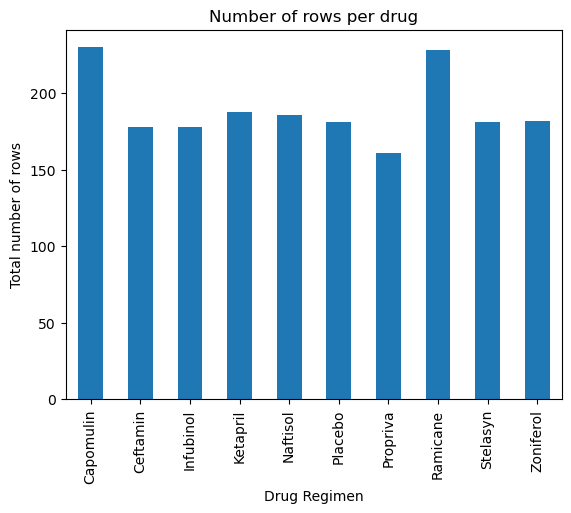

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_time_per_drug = merged_data.groupby('Drug Regimen').size()
mouse_time_per_drug.plot (kind='bar', xlabel = 'Drug Regimen', ylabel = 'Total number of rows', title ='Number of rows per drug')
plt.show()

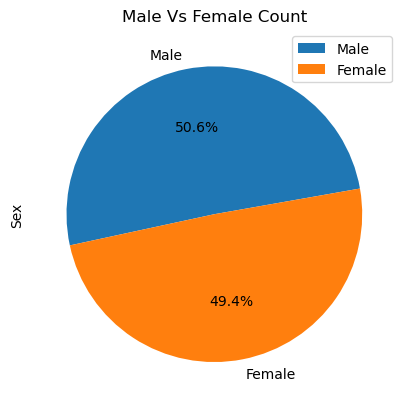

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = merged_data['Sex'].value_counts()
gender_count.plot (kind = 'pie',autopct='%1.1f%%', startangle = 10,legend = True, title = 'Male Vs Female Count')
plt.show()

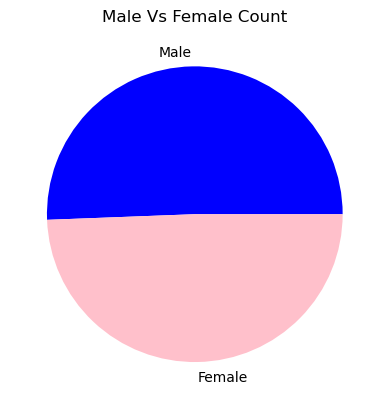

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie (gender_count,labels = gender_count.index,colors=['blue', 'pink'])
plt.title ("Male Vs Female Count")
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

regimen_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

filtered_regimens = merged_data[merged_data['Drug Regimen'].isin(regimen_names)]

total_filtered_regimens = filtered_regimens.groupby('Mouse ID')['Tumor Volume (mm3)'].last()

total_filtered_regimens_df = pd.DataFrame(total_filtered_regimens)

In [13]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
treatments = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin','Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

tumor_vol_data = []

for treatment in treatments:
    treatment_data = merged_data[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_vol_data.append(treatment_data) 
    
    
q1 = treatment_data.quantile(0.25)
q3 = treatment_data.quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]


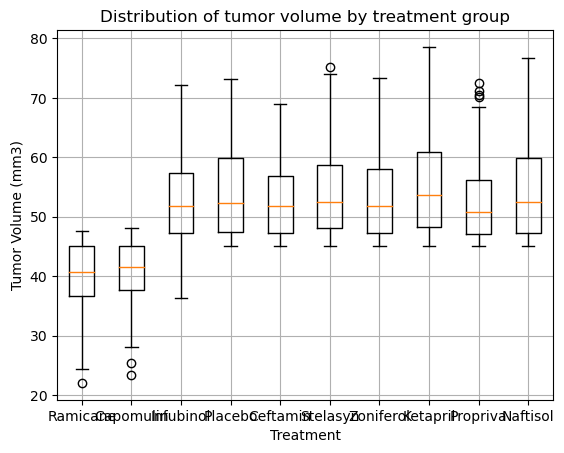

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title('Distribution of tumor volume by treatment group')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()

## Line and Scatter Plots

In [17]:
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


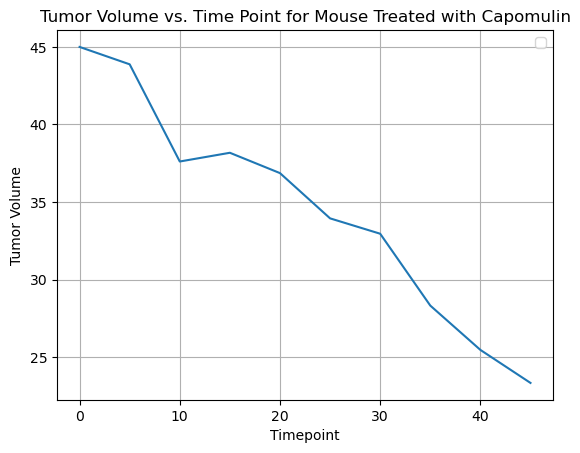

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_data = merged_data[merged_data['Drug Regimen']=='Capomulin']
mouse_id = 's185'
single_mouse_capomulin = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

plt.plot(single_mouse_capomulin['Timepoint'], single_mouse_capomulin['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs. Time Point for Mouse Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.legend()
plt.grid()
plt.show()

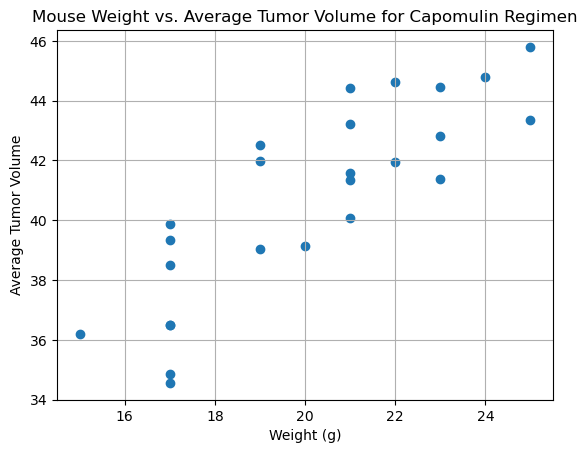

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weights, average_tumor_volume, marker='o')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.grid()
plt.show()

## Correlation and Regression

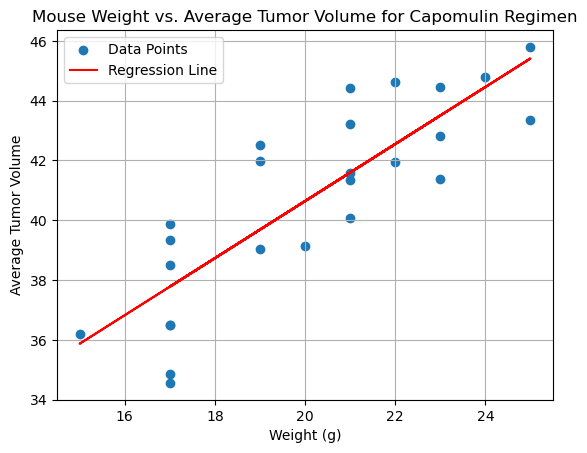

In [54]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation_coefficient = average_tumor_volume.corr(mouse_weights)

slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)

plt.scatter(mouse_weights, average_tumor_volume,label='Data Points')
plt.plot(mouse_weights, intercept + slope * mouse_weights, label='Regression Line', color = 'r')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.legend()
plt.grid()
plt.show()

